In [1]:
import pandas as pd
import numpy as np
from GM11 import GM11

In [2]:
inputfile1 = './new_reg_data.csv'
inputfile2 = './data.csv'
new_reg_data = pd.read_csv(inputfile1, index_col=0)
data = pd.read_csv(inputfile2, index_col=0)
new_reg_data.index = range(1994, 2014)
new_reg_data.loc[2014] = None
new_reg_data.loc[2015] = None

/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_9359/1109474087.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_reg_data.loc[2014] = None
/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_9359/1109474087.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_reg_data.loc[2015] = None


In [3]:
cols = new_reg_data.keys()
for col in cols:
    f = GM11(new_reg_data.loc[range(1994, 2014), col].values)[0]
    new_reg_data.loc[2014, col] = f(len(new_reg_data)-1)
    new_reg_data.loc[2015, col] = f(len(new_reg_data))
    new_reg_data[col] = new_reg_data[col].round(2)

In [4]:
outputfile = 'predict_GM11.csv'
y = list(data['y'].values)
y.extend((np.nan, np.nan))
new_reg_data['y'] = y
new_reg_data.to_csv(outputfile)
print('预测结果为:\n', new_reg_data.loc[2014:2015, :])

预测结果为:
               x1       x3        x4        x5          x6       x7        x8  \
2014  8142148.24  7042.31  43611.84  35046.63  8505522.58  4600.40  18686.28   
2015  8460489.28  8166.92  47792.22  38384.22  8627139.31  5214.78  21474.47   

           x13   y  
2014  44506.47 NaN  
2015  49945.88 NaN  


In [5]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

In [41]:
def standard(data):
    return (data - np.mean(data)) / np.std(data)
inputfile = './predict_GM11.csv'
data = pd.read_csv(inputfile, index_col=0)
feature = data.keys()[:-1]
data_train = data.loc[1994:2014].copy()
data_train = standard(data_train)
x_train = data_train[feature].values[:-1]
y_train = data_train['y'].values[:-1]

/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [42]:
len(x_train)

20

In [43]:
linearSVR = LinearSVR()
linearSVR.fit(x_train, y_train)
x = standard(data[feature]).values
data[u'y_pred'] = linearSVR.predict(x) * np.std(data['y']) + np.mean(data['y'])
outfile = 'predict_SVR_GM11.csv'
data.to_csv(outfile)

/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


真实值与预测值分别为:
             y       y_pred
1994    64.87    44.541361
1995    99.75    87.181272
1996    88.11    98.249570
1997   106.07   106.065292
1998   137.32   143.083068
1999   188.14   174.039746
2000   219.91   200.671782
2001   271.91   210.705674
2002   269.10   199.308660
2003   300.55   269.856122
2004   338.45   343.213708
2005   408.86   412.295102
2006   476.72   491.787669
2007   838.99   614.253528
2008   843.14   748.853568
2009  1107.67   958.442677
2010  1399.16  1215.803449
2011  1535.14  1364.057597
2012  1579.68  1549.014761
2013  2088.14  1854.824220
2014      NaN  1939.594615
2015      NaN  2251.104307


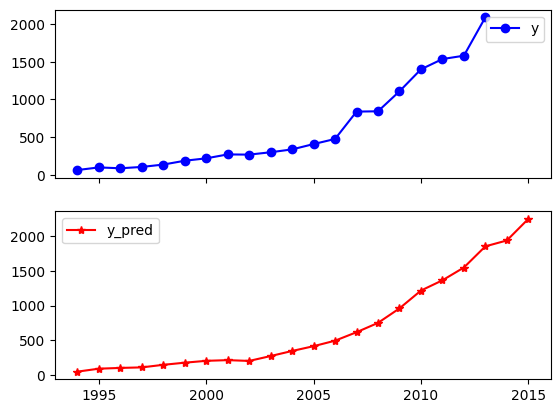

In [44]:
print('真实值与预测值分别为:\n', data[['y', 'y_pred']])
fig = data[['y', 'y_pred']].plot(subplots=True, style=['b-o', 'r-*'])
plt.show()